In [ ]:
#Code:
#Tutorial 3 : BSM ***
#Tutorial 5 : Binomial Model ***
#Tutorial 6(i) : GBM
#Tutorial 6(ii) : Option Pricing with MC methods *** (and edited)
#
#Tutorial 7(i) : Delta Option Call with MC
#Tutorial 7(ii) : Option Pricing with MC (no dt)
#Tutorial 8 : Antithetic Variates
#Tutorial 9 : Control Variates for Monte Carlo
#Tutorial 10 : FD - Explicit
#Tutorial 11 : FD - Implicit

In [419]:
# --- TUTORIAL 3 -------------------------------------------------------------
#LAB EXAM FIGURE 1
# BLACK SCHOLES MERTON MODEL
#(added in how to calculate delta)

# --- Define Libraries (collection of common style functions)-----------------
import math as m 
from scipy.stats import norm 

# --- Define Input Data ------------------------------------------------------
Call_or_Put = "Call" 
S = 37.0 #this cant be computed if it is negtaive becasue of the log later on
K = 39.0
r = 0.04
T = 1.0
sigma = 0.2
q = 0.0

# --- Define Score Functions -------------------------------------------------
def CallOptionValue(S, K, r, sigma, T, q):
    d1 = (m.log(S/K) + (r -q + 0.5 * sigma**2) * T)/(sigma * m.sqrt(T))
    d2 = d1 - sigma * m.sqrt(T)
    return S *m.exp(-q*T) * norm.cdf(d1) - K * m.exp(-r*T) * norm.cdf(d2)
def PutOptionValue(S, K, r, sigma, T, q):
    d1 = (m.log(S/K) + (r -q + 0.5 * sigma**2) * T)/(sigma * m.sqrt(T))
    d2 = d1 - sigma * m.sqrt(T)
    return K * m.exp(-r*T) * norm.cdf(-d2) - S * m.exp(-q*T) *norm.cdf(-d1)

#using the formulae for call and put
#the functions are activated only if they are called

# --- Main Function ----------------------------------------------------------
if Call_or_Put == "Call":
    score = CallOptionValue(S, K, r, sigma, T, q)
    delta = norm.cdf(d1)
    flag= 1
elif Call_or_Put == "Put":
    score = PutOptionValue(S, K, r, sigma, T, q)
    delta = norm.cdf(d1) -1
    flag=1
else:
    score = "Declaration not Correct. Retry."
    flag=0
    
if flag==1:
    print('The price of the European', Call_or_Put, 'option is %.5f.' %score, 'delta is:', delta) #to 5 d.c.
#% must be put before score on this last line so it is read as a number not a string
else:
    print(score)

The price of the European Call option is 2.73652. delta is: 0.5146703207875327


In [3]:
# --- TUTORIAL 5 -------------------------------------------------
#LAB EXAM FIGURE 2
# BINOMIAL TREE / BINOMIAL MODEL
#(added in how to calculate delta and a)

# --- Define Libraries -----------------------------------------------
import math as m
import numpy as np #the library that gives you the possibility to manage the arrays #the library to manage matrices

# --- Define Input Data -------------------------------------------------
cp = 1 # +1/-1 for Call/Put
ae = -1 # +1/-1 for American/European
S = 60
K = 65
r = 0.08
T = 0.25
sigma = 0.3
n = 6

# --- Calculation Other Values ----------------------------------------------
dt = T / n # <- h
u = m.exp(sigma * m.sqrt(dt)) 
d = 1 / u
p = (m.exp(r * dt) - d) / (u - d) 
a = m.ceil ((m.log(K/(S*d**n)))/(m.log(u/d)))

# --- Define Result Matrix -------------------------------------------------
opt_val = np.zeros((n+1, n+1))
S_val = np.zeros((n+1, n+1))  #np.zeros matrix full of zeros
Delta =  np.zeros((n,n))

# Generate the Underlying Stock Price ----------
#index specific language = starts at zero
S_val[0,0] = S
for i in range(1,n+1): #range means we start at zero and we and at the one before the end#range(2,7) = 2,3,4,5,6 #default atart at 0
    S_val[i,0] = S_val[i-1,0] * u #SVal 1,0 is S0 on the matrix # SVal[1,0] =SVal[i-1,0] . u = SVal[0,0] . u#start from one and end at the number before the end # range[1,i+1] = range[1,2] = j=1#SVal[i,j]= SVal[1,1] = SVal[i-1,j-1] . d#now we do i=2
    for j in range(1,i+1):
        S_val[i,j] = S_val[i-1,j-1] * d
        
#Backward recursion for option price -------------------------------------------
for j in range(n+1):
    opt_val[n,j] = max(0, cp*( S_val[n,j]-K )) #payoff at T  #cp = call or put # take out cp and it is either 1/-1 BEFORE we run code

for i in range(n-1,-1,-1):  # adding a thrid term we look at the size of the jump # range(1,10,2) = 1,3,5,7,9 # range(m,1,-1)
    for j in range(i+1):
            opt_val[i,j] = ( p * opt_val[i+1,j] + (1-p) * opt_val[i+1,j+1] ) / m.exp(r * dt)
            if ae == 1: # if its American
                opt_val[i,j] = max( opt_val[i,j], cp * (S_val[i,j] - K) ) #!!!
            Delta[i,j] = (opt_val[i+1,j] - opt_val[i+1,j+1]) / (S_val[i+1,j] - S_val[i+1,j+1])

if cp == 1:
    Call_or_Put = "Call"
else:
    Call_or_Put = "Put"
if ae == 1:
    Type= "American"
else:
    Type= "European"
    
print('The price of the', Type, Call_or_Put, 'option is %.5f.' % opt_val[0,0])
print('The first index where the option is exercised %.1f.' %a)
print(Delta) #put negative, call positive

The price of the European Call option is 2.23584.
The first index where the option is exercised 4.0.
[[0.36549741 0.         0.         0.         0.         0.        ]
 [0.51193832 0.19187772 0.         0.         0.         0.        ]
 [0.68631755 0.30519508 0.05752917 0.         0.         0.        ]
 [0.86610414 0.47316339 0.10605261 0.         0.         0.        ]
 [1.         0.70735781 0.19550353 0.         0.         0.        ]
 [1.         1.         0.36040254 0.         0.         0.        ]]


Text(0.5, 1.0, 'Monte Carlo Method simulations -  GBM Paths')

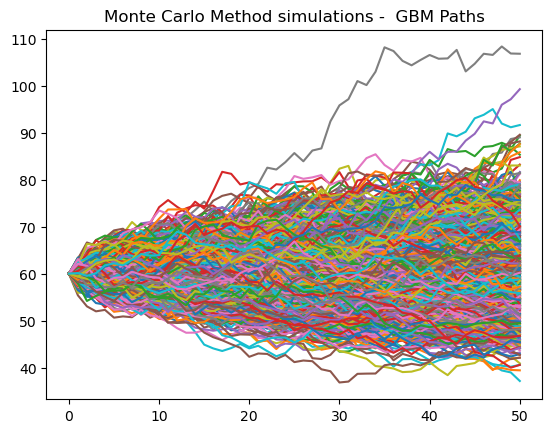

In [285]:
#TUTORIAL 6 (i)
#GEOMETRIC BROWNIAN MOTION (the basic)
#St+dt =St e^(r-1/2 sigma ^2)dt + sigmaE(dt)^1/2
#implementation

# --- Define Library ---------------------------------------------------------
import math as m
import numpy as np
import matplotlib.pyplot as plt

# --- Define Input Data ------------------------------------------------------
S	= 60
K	= 65
r	= 0.08
T	= 0.25
sigma	= 0.3
q=0
n = 50 #5
nr = 1000 #simulate the share price 1000 times #3

# --- Calculation Other Values------------------------------------------------
# Here we refer to the risk-neutral valuation
nu = r - 0.5 * sigma**2   #from St+dt
dt = T / n              # <- h

# --- Define Result Matrix
S_val = np.zeros((nr, n+1)) #zeros matrix, no of rows= no of simulations, columns stop at n
rand = np.random.randn(nr, n) #array (matrix) , same no.of rows , one column less full of random numbers, random library returns random numbers sampled from the normal dbn, randn is the std normal dbn

# Process the Monte Carlo Method ---------------------------------------------
S_val[:,0] = S #all rows in column 0 = S
for i in range(nr):
   for j in range(1,n+1):
      S_val[i,j] = S_val[i,j-1] * m.exp(nu*dt + sigma * dt**0.5 * rand[i,j-1]) # the St+dt formula, epsilon is rand

# Plot -----------------------------------------------------------------------
plt.figure()
for i in range(nr):
    plt.plot(S_val[i,:])
plt.title('Monte Carlo Method simulations -  GBM Paths')

The price of the Monte Carlo Method with 1000 simulations is 5.72472.
The standard deviation is 6.03346.


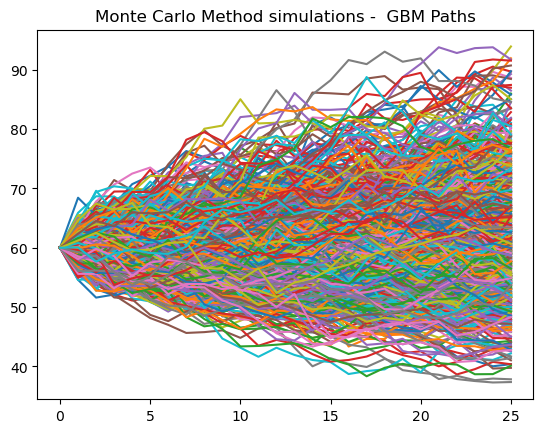

In [5]:
# ---TUTORIAL 6  (ii)-------------------------------------------------
#LAB EXAM FIGURE 4
#       Option Pricing with Monte Carlo Methods
#MONET CARLO PRICING

#FTAP : martingale measure <=> no arbitrage
#f0 =e^-rT x (1/nr (summation 1 -> nr of f(SiT))     ( f0 is the option price today )
#SiT is the value of the ith share at maturity

# --- Define Library ---------------------------------------------------
import math as m
import numpy as np
import matplotlib.pyplot as plt

# --- Define Input Data -------------------------------------------------
cp = -1     # +1/-1 for Call/Put
S	= 60
K	= 65
r	= 0.08
T	= 0.25
sigma	= 0.3

n = 25 # n DEFINES THE TIME STEP
nr = 1000 # nr is the number of simulations

# --- Calculation Other Values ---------------------------------------------
# Here we refer to the risk-neutral valuation.
nu = r - 0.5 * sigma**2
dt = T / n              # <- h

# --- Define Result Matrix -------------------------------------------------
FinPayOff = np.zeros(( nr, 1))
S_val = np.zeros((nr, n+1))
rand = np.random.randn(nr, n) #sampled from std normal dbn, different every time we run the code

# Process the Monte Carlo Method -------------------------------------------
S_val[:,0] = S
for i in range(nr):
    for j in range(1,n+1):
        S_val[i,j] = S_val[i,j-1] * m.exp(nu*dt + sigma * dt**0.5 * rand[i,j-1])

# Mean of Monte Carlo results for option price -----------------------------
FinPayOff = np.maximum(cp*(S_val[:,-1] - K), 0)

PDisc = np.exp( -r * T ) * FinPayOff
price = PDisc.mean() #mean
std = np.std(PDisc) #std

# Plot -----------------------------------------------------------------------
plt.figure()
for i in range(nr):
    plt.plot(S_val[i,:])
plt.title('Monte Carlo Method simulations -  GBM Paths')
    
print('The price of the Monte Carlo Method with', nr, 'simulations is %.5f.' % price)
print('The standard deviation is %.5f.' % std)

In [7]:
#tutorial 6 (ii) extention
#LAB EXAM FIGURE 3
#(added in how to calculate delta #####)

#MC NO dt

# --- Define Library -----------------------------------------------------------
import math as m
from scipy.stats import norm
import numpy as np

# --- Define Input Data ---------------------------------------------------------
S = 60
K = 65
r = 0.08
T = 0.25
sigma = 0.3
nr = 10000             #10000 simulations
#we dont need n in the code because we use only the value of the share at maturity

# --- Calculation Other Values --------------------------------------------------
nu = r - 0.5 * sigma**2
# no dt because we use only the value of the share at maturity

# --- Define Indicator Function -------------------------------------------------
def I(x): #where we let x = S-K         #####
    if x > 0:                           
        return 1           #call             
    else:                               
        return 0           #=1 for put

# --- Define Result Matrix ------------------------------------------------------
FinPayOff = np.zeros((nr, 1))
S_val = np.zeros((nr, 1))
rand = np.random.randn(nr, 1)
Delta = np.zeros((nr, 1)) #####

# --- Main Function -------------------------------------------------------------
#this code is split but it could be together ------------------------------------
for i in range(nr):
    S_val[i,0] = S * m.exp(nu*T + sigma * T**0.5 * rand[i,0]) #s formula #T not dt
    Delta[i,0] = np.exp( -r * T) * (S_val[i,0] / S ) * I(S_val[i,0]-K) #####
    
# Mean of MC results for option price --------------------------------------------
FinPayOff = np.maximum(cp*(S_val[:,-1] - K), 0)
PDisc = np.exp( -r * T ) * FinPayOff
price = PDisc.mean() #mean
std = np.std(PDisc) #std
mean, std = norm.fit(Delta)  #####

#mean = Delta.mean()  <- portfolio delta #####
#std = np.std(Delta)  <- portfolio std #####

print('The price of the Monte Carlo Method with', nr, 'simulations is %.5f.' % price)
print('The standard deviation is %.5f.' % std)
print(('The Delta of the Call Option with %i simulations is: Delta = %.5f') % (nr, mean))

The price of the Monte Carlo Method with 10000 simulations is 2.19164.
The standard deviation is 0.55179.
The Delta of the Call Option with 10000 simulations is: Delta = 0.37813


In [19]:
# --- TUTORIAL 7 (i) -----------------------------------------------------------
# DELTA OPTION CALL WITH MONTE CARLO 
#DELTA CALCULATION USING INDICATOR FUNCTION
#No discretization in time is used when the
#option is not path dependent, so you do not need to simulate the entire path
#of the underlying.
#(added in how to calculate delta)
#when K is bigger than S

# --- Define Library -----------------------------------------------------------
import math as m
from scipy.stats import norm
import numpy as np

# --- Define Input Data ---------------------------------------------------------
S = 60
K = 65
r = 0.08
T = 0.25
sigma = 0.3
nr = 10000             #10000 simulations
#we dont need n in the code because we use only the value of the share at maturity

# --- Calculation Other Values --------------------------------------------------
nu = r - 0.5 * sigma**2
# no dt because we use only the value of the share at maturity

# --- Define Result Matrix ------------------------------------------------------
Delta = np.zeros((nr, 1))
S_val = np.zeros((nr, 1))
rand = np.random.randn(nr, 1)

# --- Define Indicator Function -------------------------------------------------
def I(x): #where we let x = S-K        , #####CALL OPTION
    if x > 0:                           #we use the indicator function to check if S_Val - K is positive or negative
        return 1                        #if we have 2 call options we dont want to link them to the same strike
    else:                               #using I(x) (and not S-K) means we can use this with however many different options because the values change each time
        return 0

# --- Main Function -------------------------------------------------------------
#this code is split but it could be together ------------------------------------
for i in range(nr): #we dont simulate the entire path of the underlying
    S_val[i,0] = S * m.exp(nu*T + sigma * T**0.5 * rand[i,0]) #s formula #T not dt
    
# option Delta results for option price -----------------------------------------
for i in range(nr):    ######
    Delta[i,0] = np.exp( -r * T) * (S_val[i,0] / S ) * I(S_val[i,0]-K) #delta formula # to check if it is positive or negative we cannot write if S_Val > K so use I(x) #if we have two call options we dont want to link each to the same strike #if we dont like with the strike and we link with indicator function 1 or 0 #then we can also use this with 100 options as well as being able to use it with 2 options
#keep this inside I for puts too and just change the indicator function

mean, std = norm.fit(Delta) # fit the value of delta with the normal dbn and we extract the mean and the std.

FinPayOff = np.maximum(S_val[:,-1]-K,0)
PDisc = np.exp( -r * T ) * FinPayOff
price = PDisc.mean() #mean
std = np.std(PDisc) #std

print(price)
print(('The Delta of the Call Option with %i simulations is: Delta = %.5f') % (nr, mean))
print(('The variance is %.5f') % (std)) # should always be positive #variance?

#check delta matrix #compare with S_Val matrix #if S_Val >K then the corresponding value of delta is 0 (delta of a call is always positive) # delta could range between [0,1.9] not reliable if [0.36 - 3(0.54), 0.36 + 3(0.54)] #variance reduction techniques

2.146923395994239
The Delta of the Call Option with 10000 simulations is: Delta = 0.37027
The variance is 4.58258


In [327]:
# --- TUTORIAL 7 (ii)-------------------------------------------------
# Option Pricing with Monte Carlo 
#DELTA CALCULATION USING SAMPLE DIFFERENCE
#with no dt so we use a different formula for delta

#when S is bigger than K

# --- Define Library -------------------------------------------------
import math as m
import numpy as np

# --- Define Input Data -------------------------------------------------
cp = +1 # +1/-1 for Call/Put
S = 50
dS = 0.5            #we must be given dS
K = 52
r = 0.05
T = 5/12
sigma = 0.4
# nr is the number of simulations
nr = 1000

# --- Calculation Other Values ---------------------------------------------
nu = r - 0.5 * sigma**2

# --- Define Result Matrix -------------------------------------------------
FinPayOff_1 = np.zeros(( nr, 1))          #Creates a numpy array to store the final payoffs of the option with the initial stock price S.
FinPayOff_2 = np.zeros(( nr, 1))          #Creates a numpy array to store the final payoffs of the option with the stock price S+dS.
S_val = np.zeros((nr, 1))
S_val_dS = np.zeros((nr, 1))
rand = np.random.randn(nr, 1)

# --- Main Function --------------------------------------------------------
# Process the Monte Carlo Method -------------------------------------------
for i in range(nr): #we dont simulate the entire path of the underlying
    S_val[i,0] = S * m.exp(nu*T + sigma * T**0.5 * rand[i,0])
    S_val_dS[i,0] = (S+dS) * m.exp(nu*T + sigma * T**0.5 * rand[i,0])

# Mean of Monte Carlo results for option price -----------------------------
FinPayOff_1 = np.maximum(cp*(S_val[:,-1] - K), 0)
FinPayOff_2 = np.maximum(cp*(S_val_dS[:,-1] - K), 0)
SampleDiff = np.exp( -r * T ) * (FinPayOff_2-FinPayOff_1)/dS

Delta = SampleDiff.mean()

print('The Delta of the Option computed with Monte Carlo Method with', nr, 'simulations is %.5f.' % Delta)

The Delta of the Option computed with Monte Carlo Method with 1000 simulations is 0.51616.


In [5]:
# --- TUTORIAL 8 -------------------------------------------------
# ANTITHETIC VARIATES

# --- Define Library -------------------------------------------------
import math as m
import numpy as np

# --- Define Input Data -------------------------------------------------
cp = -1 # +1/-1 for Call/Put
S = 60
K = 65
r = 0.08
T = 0.25
sigma = 0.3
n = 25
nr = 1000

# --- Calculation Other Values ----------------------------------------------
nu = r - 0.5 * sigma**2
dt = T / n

# --- Define Result Matrix -------------------------------------------------
FinPayOff = np.zeros(( int(nr/2), 1)) #/2 for the double +/- calculations
S_val = np.zeros((nr, n+1))
rand = np.random.randn(int(nr/2), n) #/2 for the double +/- calculations

# --- Main Function --------------------------------------------------
# Proces the Monte Carlo Metod ----------
S_val[:,0] = S
for i in range(0, nr, 2):
    for j in range(1,n+1):
            S_val[i,j] = S_val[i,j-1] * m.exp(nu*dt + sigma * dt**0.5 * rand[int(i/2),j-1]) #evens
            S_val[i+1,j] = S_val[i+1,j-1] * m.exp(nu*dt - sigma * dt**0.5 * rand[int(i/2),j-1]) #odds
# Mean of Monte Carlo results for option price -----
    FinPayOff[int(i/2)] = 0.5*(np.maximum(cp*(S_val[i,-1] - K), 0) + np.maximum(cp*(S_val[i+1,-1] - K), 0))
    
PDisc = np.exp( -r * T ) * FinPayOff

mean = PDisc.mean()
std = np.std(PDisc)

if cp == +1:
    Call_or_Put = "Call"
else:
    Call_or_Put = "Put"
    
print(('The price of the ' + Call_or_Put + ' option with the Antithetic Variates Method is Price: %.5f') % mean)
print(('The standard deviation of the price is: sdt = %.5f') % std)
print(('The number of simulations is %.5f') % nr)

The price of the Put option with the Antithetic Variates Method is Price: 5.79033
The standard deviation of the price is: sdt = 2.00983
The number of simulations is 1000.00000


The price of the Asian Option with CV Method and 1000 simulations is 0.62715.
The standard deviation of the price with CV Method and 1000 simulations is 1.30031.
The price of the Option without CV Method and 1000 simulations is 0.64339.
The standard deviation of the price without CV Method and 1000 simulations is 1.79366.


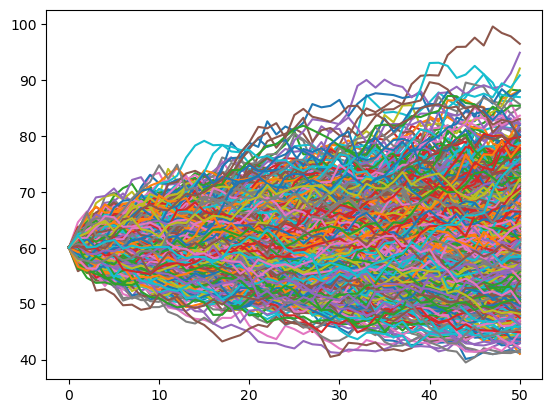

In [1]:
#--- TUTORIAL 9 -------------------------------------------------
# CONTROL VARIATES fOR MONTE CARLO
# .....................
# --- Define Library -------------------------------------------------
import math as m
import numpy as np
import matplotlib.pyplot as plt

# --- Define Input Data -------------------------------------------------------
S = 60
K = 65
r = 0.08
T = 0.25
sigma = 0.3
n = 50
nr = 1000

# --- Calculation Other Values ------------------------------------------------
nu = r - 0.5 * sigma**2
dt = T / n

# --- Define Result Matrix ----------------------------------------------------
FinPayOff = np.zeros(( nr, 1))
S_val = np.zeros((nr, n+1))
rand = np.random.randn(nr, n)
ControlVars = np.zeros(( nr, 1))

# Process the Monte Carlo Method ----------------------------------------------
S_val[:,0] = S
for i in range(nr):
    for j in range(1,n+1):
            S_val[i,j] = S_val[i,j-1] * m.exp(nu*dt + sigma * dt**0.5 * rand[i,j-1])

FinPayOff = np.exp( -r * T ) * np.maximum(np.mean(S_val[:,1:], 1)- K, 0)

# Control Variates ------------------------------------------------------------
StockSum = np.sum(S_val,1)
ExpSum = S * ( 1 - np.exp( (n+1) * r * dt )) / ( 1 - np.exp( r * dt ))
b = np.cov(StockSum, FinPayOff)[0,1] / np.var(StockSum)
for i in range(nr):
    ControlVars[i] = FinPayOff[i] - b * (StockSum[i] - ExpSum)

mean = ControlVars.mean()
std = np.std(ControlVars)

mean_MC = FinPayOff.mean()
std_MC = np.std(FinPayOff)

# Plot ------------------------------------------------------------------------
plt.figure()
for i in range(nr):
    plt.plot(S_val[i,:])

print('The price of the Asian Option with CV Method and', nr, 'simulations is %.5f.' % mean)
print('The standard deviation of the price with CV Method and', nr, 'simulations is %.5f.' % std)
print('The price of the Option without CV Method and', nr, 'simulations is %.5f.' % mean_MC)
print('The standard deviation of the price without CV Method and', nr, 'simulations is %.5f.' % std_MC)

In [1]:
# --- TUTORIAL 10 -------------------------------------------------
# FINITE DIFFERENCES - EXPLICIT METHOD

# --- Define Libraries -------------------------------------------------
from scipy.interpolate import interp1d
import numpy as np

# --- Define Input Data -------------------------------------------------
S = 62
K = 50
r = 0.1
T = 1
sigma = 0.3
Smax = 200
n = 100
m = 50

# --- Calculation Other Values ----------------------------------------------
dt = T / n
ds = Smax / m

# --- Define Result Matrix -------------------------------------------------
opt_val = np.zeros((m+1, n+1))

# --- Main Function --------------------------------------------------
# Define Boundary Conditions ---------------------
opt_val[:,-1] = np.maximum((K-ds*np.linspace(0,m,m+1)), 0)
opt_val[0,:] = K * np.exp( - r * dt * (np.linspace(n,0,n+1)))
opt_val[-1,:] = 0

# Set up Coefficients ----------
a = 0.5 * dt * (sigma**2 * np.linspace(1,m-1,m-1) - r) * np.linspace(1,m-1,m-1)
b = 1 - dt * (sigma**2 * np.linspace(1,m-1,m-1)**2 + r)
c = 0.5 * dt * (sigma**2 * np.linspace(1,m-1,m-1) + r) * np.linspace(1,m-1,m-1)

for j in range(n-1,-1,-1):
    for i in range(1,m):
            opt_val[i,j] = a[i-1] * opt_val[i-1,j+1] + b[i-1] * opt_val[i,j+1] + c[i-1] * opt_val[i+1,j+1]

price = interp1d(ds*np.linspace(0,m,m+1), opt_val[:,0] )
print('The price of the Put option is %.5f.' % price(S))

The price of the Put option is 1.22176.


In [3]:
# --- TUTORIAL 11 -------------------------------------------------------------
# FINITE DIFFERENCE - IMPLICIT METHOD
# Student:
#.....................

# --- Define Libraries --------------------------------------------------------
from scipy.interpolate import interp1d # interpolation as part of the steps 
from scipy.sparse import diags #give the shape of matrix #takes the number and distributes in diagnals #moving through rows and columns
import numpy as np
from numpy.linalg import inv #to compute the inverse of the matrix

# --- Define Input Data -------------------------------------------------------
S = 62
K = 50
r = 0.1
T = 1
sigma = 0.3
Smax = 200
n = 100
m = 50

# --- Calculation Other Values ------------------------------------------------
dt = T / n
ds = Smax / m

# --- Define Result Matrix ----------------------------------------------------
opt_val = np.zeros((m+1, n+1)) #dimentions 
g = np.zeros((m-1, n)) #one col less than optval because we ned to eliminate BC already known
#for BC : one lessin thecolumn and two less in the rows

# --- Main Function -----------------------------------------------------------
a = - 0.5 * dt * (sigma**2 * np.linspace(1,m-1,m-1) - r) * np.linspace(1,m-1,m-1)
b = 1 + dt * (sigma**2 * np.linspace(1,m-1,m-1)**2 + r)
c = - 0.5 * dt * (sigma**2 * np.linspace(1,m-1,m-1) + r) * np.linspace(1,m-1,m-1)

U = diags([a[1:], b, c[:-1]], [-1, 0, 1]).toarray() #diagonal #take these three elements andput in these three positions
#siagonal 0 is the main diagonal -1 is one diagonal below and +1 is one diagonal above
#1: start from 1 , -1: is everything exceptthe last one

invU = inv(U) #inverse of U

# Define Boundary Conditions --------------------
opt_val[:,-1] = np.maximum((K-ds*np.linspace(0,m,m+1)), 0)
opt_val[0,:] = K * np.exp( - r * dt * (np.linspace(n,0,n+1)))
opt_val[-1,:] = 0

# # Define vector g -----------------------------------------------------------
for j in range(n):
    g[0,j] = + a[0]*opt_val[0,j]
    g[-1,j] = + c[-1]*opt_val[-1,j]

for j in range(n-1,-1,-1): #backwards in time loop
    opt_val[1:-1,j] = np.dot(inv(U), opt_val[1:-1,j+1] - g[:,j] ) #inverse of U multiplied by RHS #this goves us the vector diagonal below the centre

price = interp1d(ds*np.linspace(0,m,m+1), opt_val[:,0] ) #linear interplol between all valus onn share valand the 0th level of optval
print('The price of the Put option is %.5f.' % price(S))

The price of the Put option is 1.21305.
